In [63]:
# import all libs and frameworks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import and preprocess data

In [64]:

df = pd.read_csv("Mumbai_House_Price.csv")
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [65]:
df.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [66]:
df['area'].min()

127

In [67]:
# Analyze all dataset
df_use = df.drop(['locality'], axis=1)

In [68]:
# Get all data dimension
print(df_use.nunique())
print()
for col in df_use.columns:
    print(f'{col}: {pd.unique(df_use[col])}')

bhk             10
type             5
area          2331
price         4729
price_unit       2
region         228
status           2
age              3
dtype: int64

bhk: [ 3  2  5  1  4  6  9  8 10  7]
type: ['Apartment' 'Villa' 'Studio Apartment' 'Independent House' 'Penthouse']
area: [ 685  640  610 ... 1974 1634 3049]
price: [ 2.5  52.51  1.73 ... 21.87 34.67  4.38]
price_unit: ['Cr' 'L']
region: ['Andheri West' 'Naigaon East' 'Borivali West' 'Panvel' 'Mira Road East'
 'Parel' 'Boisar' 'Santacruz East' 'Badlapur East' 'Fort' 'Badlapur West'
 'Khopoli' 'Chembur' 'Jogeshwari West' 'Vasai' 'Kalamboli' 'Powai'
 'Ghansoli' 'Thane West' 'Vikhroli' 'Bhiwandi' 'Airoli' 'Ambernath West'
 'Borivali East' 'Virar' 'Kharghar' 'Ulwe' 'Kamothe' 'Jogeshwari East'
 'Mulund West' 'Palghar' 'Goregaon West' 'Taloja' 'Rasayani'
 'Ghatkopar East' 'Ulhasnagar' 'Dombivali' 'Kewale' 'Nala Sopara'
 'Goregaon East' 'Kandivali East' 'Kurla' 'Andheri East' 'Dahisar'
 'Karanjade' 'Mahim' 'Vashi' 'Malad West' 'G

In [69]:
# Reduce the dimension of region attribute
stats = df_use['region'].value_counts(ascending=False)
print(stats)
print(stats.describe()) 
# => Over 50% of house place in less popular region 
# (less than 11 houses build in that location)
# => Convert all of those region to 'Others'

region
Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: count, Length: 228, dtype: int64
count      228.000000
mean       333.500000
std       1251.273904
min          1.000000
25%          2.000000
50%         11.000000
75%        218.000000
max      14868.000000
Name: count, dtype: float64


In [70]:
stats_to_change = stats[stats<=11]
df_use1 = df_use
def convert(region):
    if region in stats_to_change:
        return 'Others'
    return region

df_use1.region = df_use.region.apply(convert)

In [71]:
# Normalize data
max_values = {}
numberic_cols = ['bhk', 'area', 'price']
for col in numberic_cols:
    max_v = df_use1[col].max()
    max_values.update({col: max_v})
    df_use1[col] = (df_use1[col] - df_use1[col].min()) / (df_use1[col].max() - df_use1[col].min())
df_use1.head()

,bhk,type,area,price,price_unit,region,status,age
0,0.222222,Apartment,0.035154,0.015153,Cr,Andheri West,Ready to move,New
1,0.111111,Apartment,0.032319,0.520356,L,Naigaon East,Under Construction,New
2,0.111111,Apartment,0.030429,0.007374,Cr,Borivali West,Under Construction,New
3,0.111111,Apartment,0.047187,0.595818,L,Panvel,Under Construction,New
4,0.111111,Apartment,0.033516,0.940600,L,Mira Road East,Under Construction,New


In [72]:
# Get all data dimension
print(df_use1.nunique())
print()
for col in df_use1.columns:
    print(f'{col}: {pd.unique(df_use1[col])}')

bhk             10
type             5
area          2331
price         4729
price_unit       2
region         115
status           2
age              3
dtype: int64

bhk: [0.22222222 0.11111111 0.44444444 0.         0.33333333 0.55555556
 0.88888889 0.77777778 1.         0.66666667]
type: ['Apartment' 'Villa' 'Studio Apartment' 'Independent House' 'Penthouse']
area: [0.03515404 0.03231903 0.03042903 ... 0.11636112 0.09494109 0.18408618]
price: [0.01515305 0.52035559 0.00737448 ... 0.21082938 0.34013537 0.03414486]
price_unit: ['Cr' 'L']
region: ['Andheri West' 'Naigaon East' 'Borivali West' 'Panvel' 'Mira Road East'
 'Parel' 'Boisar' 'Santacruz East' 'Badlapur East' 'Others'
 'Badlapur West' 'Khopoli' 'Chembur' 'Jogeshwari West' 'Vasai' 'Kalamboli'
 'Powai' 'Ghansoli' 'Thane West' 'Vikhroli' 'Bhiwandi' 'Airoli'
 'Ambernath West' 'Borivali East' 'Virar' 'Kharghar' 'Ulwe' 'Kamothe'
 'Jogeshwari East' 'Mulund West' 'Palghar' 'Goregaon West' 'Taloja'
 'Rasayani' 'Ghatkopar East' 'Ulhasnaga

In [73]:
df_use2 = pd.get_dummies(df_use1, columns=['type', 'price_unit', 'region', 'status', 'age'], dtype = float)

In [74]:
# Get all data dimension
df_use2.head()

,bhk,area,price,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,price_unit_Cr,price_unit_L,...,region_Ville Parle West,region_Virar,region_Virar West,region_Wadala,region_Worli,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown
0,0.222222,0.035154,0.015153,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.111111,0.032319,0.520356,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.111111,0.030429,0.007374,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.111111,0.047187,0.595818,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.111111,0.033516,0.940600,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [75]:
print(max_values)
df_use2.describe()

{'bhk': 10, 'area': 16000, 'price': 99.99}


,bhk,area,price,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,price_unit_Cr,price_unit_L,...,region_Ville Parle West,region_Virar,region_Virar West,region_Wadala,region_Worli,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown
count,76038.000000,76038.000000,76038.000000,76038.000000,76038.00000,76038.000000,76038.000000,76038.000000,76038.000000,76038.000000,...,76038.000000,76038.000000,76038.000000,76038.000000,76038.00000,76038.000000,76038.000000,76038.000000,76038.000000,76038.000000
mean,0.112790,0.056545,0.286719,0.984429,0.00096,0.000039,0.011599,0.002972,0.538954,0.461046,...,0.001078,0.020477,0.000250,0.011481,0.00288,0.591573,0.408427,0.500697,0.307175,0.192128
std,0.102528,0.042227,0.332392,0.123810,0.03097,0.006281,0.107075,0.054437,0.498484,0.498484,...,0.032822,0.141625,0.015806,0.106534,0.05359,0.491546,0.491546,0.500003,0.461326,0.393975
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.032319,0.007577,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.111111,0.046935,0.045459,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.222222,0.066276,0.585918,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Convert dataframe to nparray
train_y = df_use2['price'].to_numpy()
train_x = df_use2.drop(['price'], axis=1).to_numpy()

print(train_x.shape)
print(train_y.shape)

(76038, 129)
(76038,)


# Build model and training

In [77]:
import tensorflow as tf
import keras
from keras import layers, optimizers

In [78]:
def custom_dense(unit=128, activation='relu', bias=True, batch_norm=True):
    def _custom_dense(input):
        x = layers.Dense(unit, activation, bias)(input)
        if batch_norm:
            x = layers.BatchNormalization()(x)
        return x
    return _custom_dense

def simple_ANN(att_dims):
    input = keras.Input(shape= (att_dims, ), name='ANN_input')
    x = custom_dense(256, batch_norm=True)(input)
    x = custom_dense(128, batch_norm=True)(x)
    x = custom_dense(64, batch_norm=True)(x)
    x = custom_dense(32, batch_norm=True)(x)
    x = layers.Dropout(0.3)(x)
    output = custom_dense(1, 'sigmoid', batch_norm=False)(x)
    model = keras.Model(input, output, name='Simple_ANN')
    model.summary()
    return model

In [79]:
dim = train_x.shape[1]
model = simple_ANN(dim)
# Compile model
model.compile(
        loss=keras.losses.MeanAbsoluteError(),
        optimizer=keras.optimizers.Adam(0.005),
        metrics=[keras.metrics.R2Score()],
)

Model: "Simple_ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ANN_input (InputLayer)      [(None, 129)]             0         
                                                                 
 dense_10 (Dense)            (None, 256)               33280     
                                                                 
 batch_normalization_8 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_9 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 64)                8

In [80]:
# Input data piepline
train_size = int(train_x.shape[0] * 0.8)

train_data = train_x[:train_size]
train_label = train_y[:train_size]
test_data = train_x[train_size:]
test_label = train_y[train_size:]

print(train_data.shape)
print(test_data.shape)

(60830, 129)
(15208, 129)


In [81]:
EPOCHS = 50
BATCH_SIZE = 256

# Train model 
history = model.fit(train_data, train_label, BATCH_SIZE, EPOCHS, validation_split=0.2, shuffle=True)

Epoch 1/50
191/191 [==============================] - 2s 4ms/step - loss: 0.0860 - r2_score: 0.8071 - val_loss: 0.0935 - val_r2_score: 0.8440
Epoch 2/50
191/191 [==============================] - 1s 4ms/step - loss: 0.0523 - r2_score: 0.9279 - val_loss: 0.0562 - val_r2_score: 0.9131
Epoch 3/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0462 - r2_score: 0.9462 - val_loss: 0.0528 - val_r2_score: 0.9169
Epoch 4/50
191/191 [==============================] - 1s 4ms/step - loss: 0.0448 - r2_score: 0.9490 - val_loss: 0.0442 - val_r2_score: 0.9346
Epoch 5/50
191/191 [==============================] - 1s 4ms/step - loss: 0.0445 - r2_score: 0.9490 - val_loss: 0.0417 - val_r2_score: 0.9431
Epoch 6/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0437 - r2_score: 0.9515 - val_loss: 0.0429 - val_r2_score: 0.9392
Epoch 7/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0429 - r2_score: 0.9527 - val_loss: 0.0399 - val_r2_score: 0.9467
Epoch 

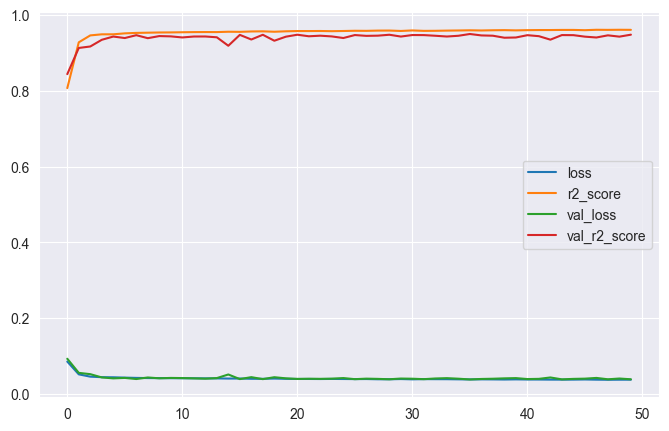

In [82]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

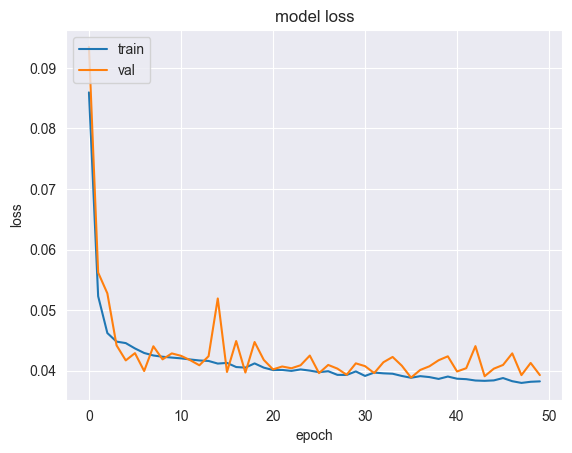

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [84]:
# Evaluate result
model.evaluate(test_data, test_label)

476/476 [==============================] - 0s 782us/step - loss: 0.0349 - r2_score: 0.9271


[0.03492638096213341, 0.9270883202552795]

In [85]:
EPOCHS = 100
BATCH_SIZE = 256

# Train model 
history = model.fit(train_data, train_label, BATCH_SIZE, EPOCHS, validation_split=0.25, initial_epoch=50)

Epoch 51/100
179/179 [==============================] - 1s 4ms/step - loss: 0.0379 - r2_score: 0.9608 - val_loss: 0.0379 - val_r2_score: 0.9525
Epoch 52/100
179/179 [==============================] - 1s 4ms/step - loss: 0.0382 - r2_score: 0.9606 - val_loss: 0.0422 - val_r2_score: 0.9445
Epoch 53/100
179/179 [==============================] - 1s 4ms/step - loss: 0.0375 - r2_score: 0.9613 - val_loss: 0.0394 - val_r2_score: 0.9501
Epoch 54/100
179/179 [==============================] - 1s 4ms/step - loss: 0.0378 - r2_score: 0.9613 - val_loss: 0.0413 - val_r2_score: 0.9458
Epoch 55/100
179/179 [==============================] - 1s 4ms/step - loss: 0.0375 - r2_score: 0.9616 - val_loss: 0.0388 - val_r2_score: 0.9497
Epoch 56/100
179/179 [==============================] - 1s 4ms/step - loss: 0.0377 - r2_score: 0.9616 - val_loss: 0.0404 - val_r2_score: 0.9479
Epoch 57/100
179/179 [==============================] - 1s 4ms/step - loss: 0.0375 - r2_score: 0.9616 - val_loss: 0.0413 - val_r2_score:

In [86]:
# 2nd 50 epochs
from sklearn import metrics
mae = metrics.r2_score(test_label, model.predict(test_data))
print(mae)

476/476 [==============================] - 0s 705us/step
0.9206492835642387
